<a href="https://colab.research.google.com/github/1o-o1/Choke-size-prediction/blob/main/chokev4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/
%ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
 000009.jpg
 Accuracy.ipynb
 Accuracy.png
'attention nusaiba.ipynb'
'attention RawData.ipynb'
 catdog/
 Catdog1F1.png
 Catdog1loss.png
 catdogmodel.h5
 catdogt1.ipynb
'Colab Notebooks'@
'Copy of catdogt1.ipynb'
'Copy of deduplication Final.ipynb'
'Copy of image_classification_part1.ipynb'
'Copy of Machine Learning Engineer | Sabbir.ipynb'
 datachoke.csv
 datapreproc.ipynb
 dedupli2.pdf
'deduplication Final.ipynb'
'Deduplication in Redundant Server.ipynb'
 deduplication.ipynb
 dup/
 F1Score.ipynb
 F1Score.png
'Final Results - f1.csv'
'Final Results - Sheet2.csv'
 heart.ipynb
 horse/
 image.png
 img2.PNG
 img3.PNG
 Inpainting.ipynb
'Machine Learning Engineer | Sabbir.ipynb'
 MC.ipynb
'No PreProc Seq3CNN.ipynb'
 ocr2.ipynb
 ocr.ipynb
'Predict Efficient.ipynb'
 Resultgen2.csv
 Resultgen3.csv
 Resultgen.csv
 Resultgen.gsheet
 results_40.csv
 results.csv
 results_shaim.csv
'selfcite (1).ipynb'
 selfcite.ipynb
 Seq3CNN.ipynb
 sh

In [ ]:
df=pd.read_csv('datachoke.csv')

In [ ]:
df.head()

,Pressure U/S of Choke,Choke,Pressure D/S of Choke,Gas Rate,Condensate Rate,Water Rate
0,"2,175",47.0,1028.2,43.16,44.95,24.71
1,"2,171",47.0,1027.6,43.05,42.54,27.96
2,"2,169",47.0,1026.9,43.02,45.77,24.70
3,"2,167",47.0,1026.9,43.01,43.08,25.71
4,"2,166",47.0,1024.9,42.98,43.57,25.67


In [ ]:
df['Pressure U/S of Choke'] = df['Pressure U/S of Choke'].str.replace(',', '').astype(float)

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

Pressure U/S of Choke    0
Choke                    0
Pressure D/S of Choke    0
Gas Rate                 0
Condensate Rate          0
Water Rate               0
dtype: int64

In [ ]:
glr = df['Gas Rate']/ ( df['Condensate Rate'] +  df['Water Rate'] )

In [ ]:
df['glr']=glr

In [ ]:
df.head()

,Pressure U/S of Choke,Choke,Pressure D/S of Choke,Gas Rate,Condensate Rate,Water Rate,glr
0,2175.0,47.0,1028.2,43.16,44.95,24.71,0.619581
1,2171.0,47.0,1027.6,43.05,42.54,27.96,0.610638
2,2169.0,47.0,1026.9,43.02,45.77,24.70,0.610473
3,2167.0,47.0,1026.9,43.01,43.08,25.71,0.625236
4,2166.0,47.0,1024.9,42.98,43.57,25.67,0.620739


In [ ]:
df=df.drop('Condensate Rate', axis=1)
df=df.drop('Water Rate', axis=1)

In [ ]:
df.describe()

,Pressure U/S of Choke,Choke,Pressure D/S of Choke,Gas Rate,glr
count,615.000000,615.000000,615.000000,615.000000,615.000000
mean,1828.591870,43.089431,1007.397724,42.214098,0.653220
std,134.935964,12.669443,27.666515,3.156580,0.031860
min,1647.000000,5.000000,917.000000,14.520000,0.538743
25%,1726.000000,33.000000,984.500000,42.080000,0.628657
50%,1817.000000,36.000000,1011.900000,42.420000,0.650376
75%,1877.000000,60.000000,1031.800000,43.040000,0.672162
max,2423.000000,64.000000,1080.600000,45.170000,0.751537


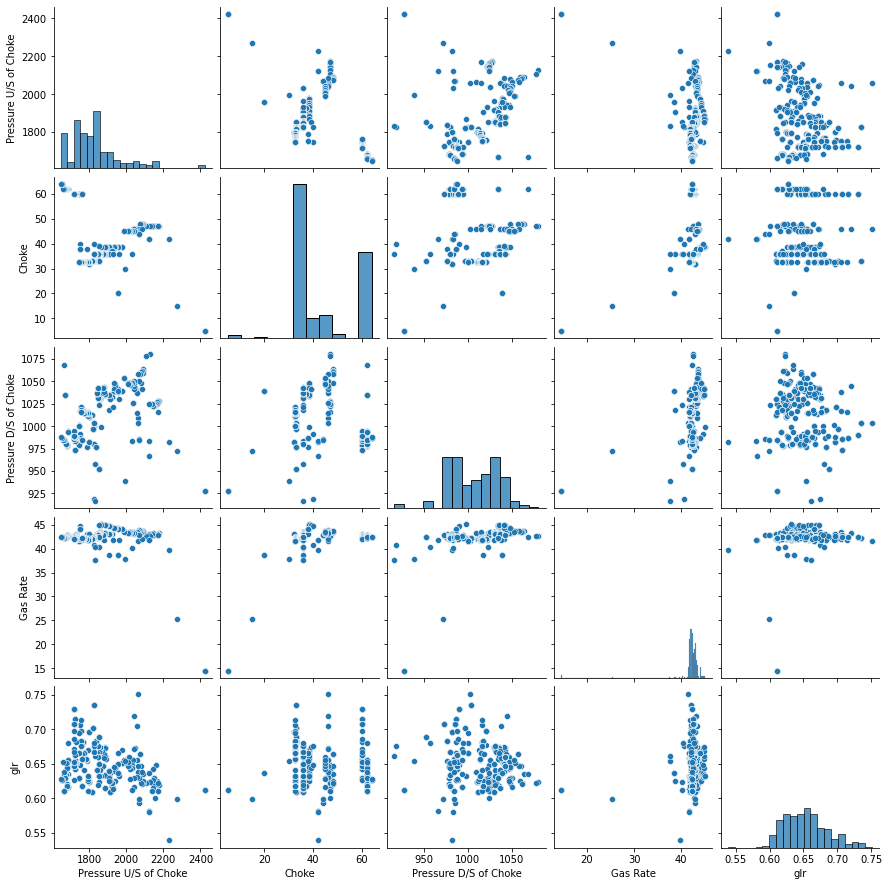

In [ ]:
sns.pairplot(df)

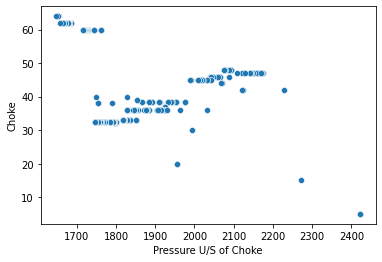

In [ ]:
#plt.figure(figsize=(10,10))

ax=sns.scatterplot(data=df , x="Pressure U/S of Choke", y="Choke")
#ax.set(xlim=(29,65))

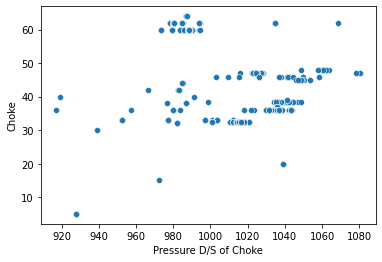

In [ ]:

ax=sns.scatterplot(data=df, x="Pressure D/S of Choke", y="Choke")

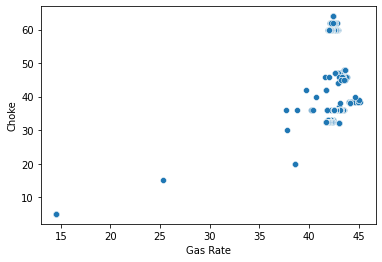

In [ ]:

ax=sns.scatterplot(data=df, x="Gas Rate", y="Choke")

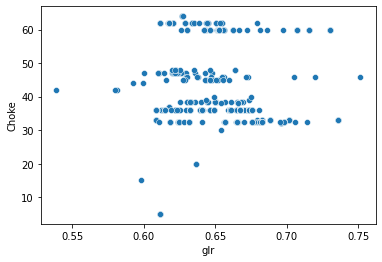

In [ ]:

ax=sns.scatterplot(data=df, y="Choke", x="glr")

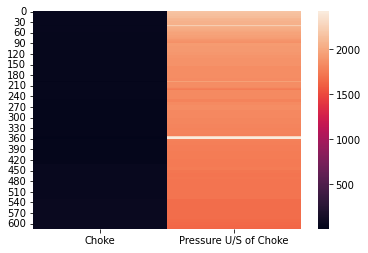

In [ ]:
tmp=df[['Choke','Pressure U/S of Choke']]
sns.heatmap(tmp)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'GLR')

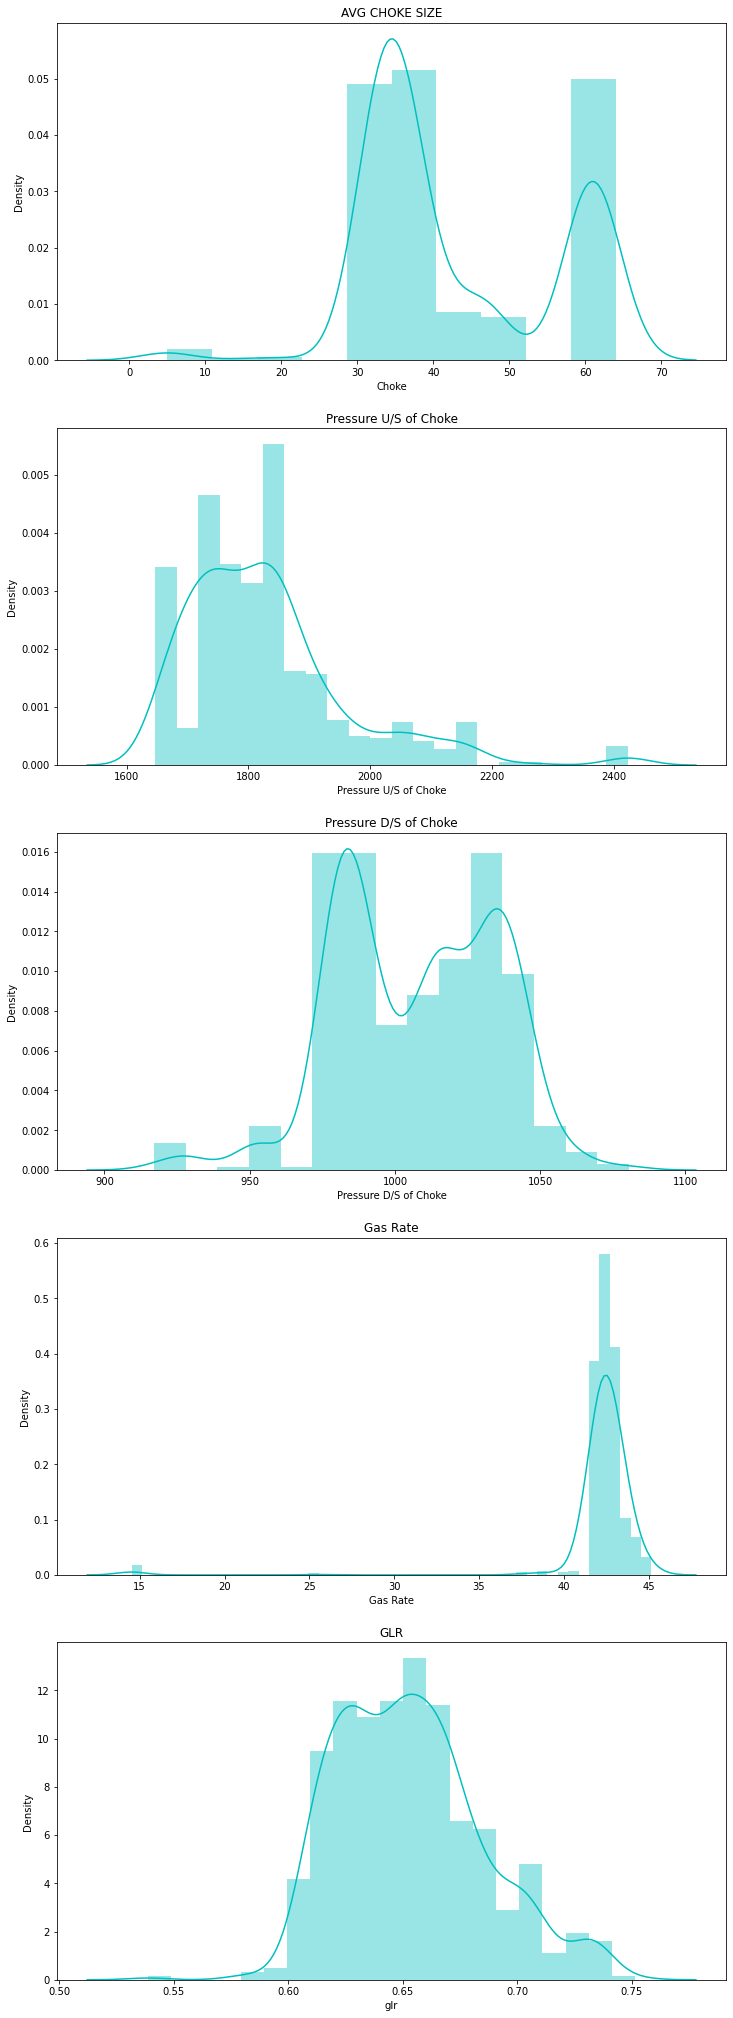

In [ ]:
f, ax = plt.subplots(5, figsize=(12,36))
sns.distplot(df['Choke'],color='c',ax=ax[0])
sns.distplot(df['Pressure U/S of Choke'],color='c',ax=ax[1])
sns.distplot(df['Pressure D/S of Choke'],color='c',ax=ax[2])
sns.distplot(df['Gas Rate'],color='c',ax=ax[3])
sns.distplot(df['glr'],color='c',ax=ax[4])
ax[0].set_title('AVG CHOKE SIZE')
ax[1].set_title('Pressure U/S of Choke')
ax[2].set_title('Pressure D/S of Choke')
ax[3].set_title('Gas Rate')
ax[4].set_title('GLR')

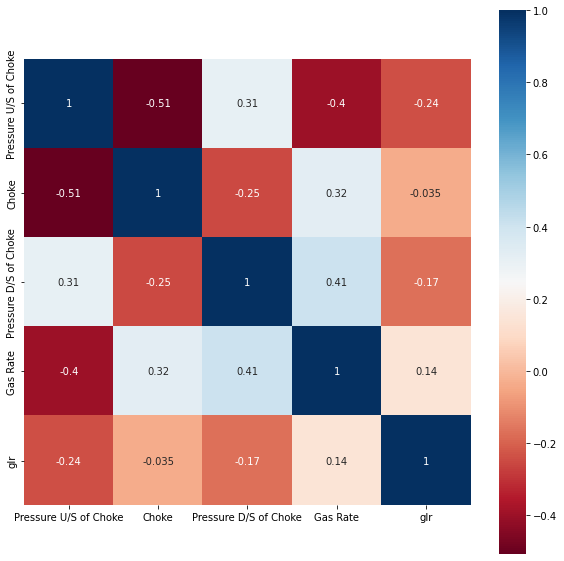

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap='RdBu',square=True)

In [ ]:
x=df.drop('Choke', axis=1)
y=df['Choke']
print(x.shape)
print(y.shape)

(615, 4)
(615,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("train Size:" +str(y_train.shape))
print("test Size:" +str(y_test.shape))

train Size:(430,)
test Size:(185,)


In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


,Coefficient
Pressure U/S of Choke,-3.745839
Pressure D/S of Choke,-4.274005
Gas Rate,5.002349
glr,-2.081839


In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print("Liner Regression")
print('---------------------------------')
print('Test set evaluation:\n__________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n__________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Liner Regression
---------------------------------
Test set evaluation:
__________________________________
MAE: 8.300233786684787
MSE: 90.33689908512305
RMSE: 9.504572535633732
R2 Square 0.3966400158172072
__________________________________
Train set evaluation:
__________________________________
MAE: 9.308247657375402
MSE: 106.28000321917224
RMSE: 10.309219331218646
R2 Square 0.3550355855038425
__________________________________


In [ ]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("Random Sample Consensus")
print('----------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Random Sample Consensus
----------------------------
Test set evaluation:
_____________________________________
MAE: 10.708935943388258
MSE: 339.87407688518414
RMSE: 18.435674028502028
R2 Square -1.270018339464532
__________________________________
Train set evaluation:
_____________________________________
MAE: 11.668454338721284
MSE: 383.3727601376983
RMSE: 19.579907051303852
R2 Square -1.3265127990829981
__________________________________


In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("Ridge Regression")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Ridge Regression
---------------------------------
Test set evaluation:
_____________________________________
MAE: 8.80373597857814
MSE: 96.29868033728965
RMSE: 9.813189101270272
R2 Square 0.35682128971040317
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.6698021574755
MSE: 108.71751618183262
RMSE: 10.426769211113893
R2 Square 0.3402434414205664
__________________________________


In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("LASSO Regression")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

LASSO Regression
---------------------------------
Test set evaluation:
_____________________________________
MAE: 10.892963012670533
MSE: 144.06950201014084
RMSE: 12.002895567742845
R2 Square 0.03776005890845757
__________________________________
Train set evaluation:
_____________________________________
MAE: 10.826072634481497
MSE: 143.3223921948469
RMSE: 11.971733048930172
R2 Square 0.1302423789401722
__________________________________


In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("Elastic Net Regression")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)
print(" Polynomial Regression")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

 Polynomial Regression
---------------------------------
Test set evaluation:
_____________________________________
MAE: 3.970723424627408
MSE: 26.96956074178546
RMSE: 5.1932225777243035
R2 Square 0.8198703530077188
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.761480315210264
MSE: 35.44077013722264
RMSE: 5.95321510926849
R2 Square 0.7849262808761069
__________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)
print("Stochastic Gradient Descent")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)


Stochastic Gradient Descent
---------------------------------
Test set evaluation:
_____________________________________
MAE: 8.361714965576565
MSE: 91.90258169023808
RMSE: 9.586583421127575
R2 Square 0.38618282455400776
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.346011486256694
MSE: 107.00098184302804
RMSE: 10.344127891853814
R2 Square 0.350660298131669
__________________________________


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print("Random Forest Regressor")
print('---------------------------------')

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Random Forest Regressor
---------------------------------
Test set evaluation:
_____________________________________
MAE: 0.14764864864864863
MSE: 0.9117787837837837
RMSE: 0.9548710822848201
R2 Square 0.993910231166518
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.09930232558139532
MSE: 0.2637515116279069
RMSE: 0.5135674363001483
R2 Square 0.99839941349156
__________________________________


In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=500, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)
print("Support Vector Machine Regressor")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Support Vector Machine Regressor
---------------------------------
Test set evaluation:
_____________________________________
MAE: 0.6366407354246996
MSE: 3.011323901885845
RMSE: 1.7353166575256072
R2 Square 0.979887373153034
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.6737413009548782
MSE: 4.068303923028641
RMSE: 2.0170036993096074
R2 Square 0.9753113362981602
__________________________________


In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D,LSTM,Bidirectional,Attention,Concatenate
from tensorflow.keras.layers import DepthwiseConv2D,Add, ReLU, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Activation,ActivityRegularization, AvgPool2D
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.metrics import CategoricalAccuracy, BinaryAccuracy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.21))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=keras.optimizers.Adam(0.00001), loss='mse',metrics='mae')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)


Epoch 1/100
430/430 [==============================] - 2s 3ms/step - loss: 2015.0907 - mae: 43.0012 - val_loss: 1995.2094 - val_mae: 42.9512
Epoch 2/100
430/430 [==============================] - 1s 2ms/step - loss: 2007.6547 - mae: 42.9064 - val_loss: 1986.0994 - val_mae: 42.8417
Epoch 3/100
430/430 [==============================] - 1s 2ms/step - loss: 1997.5668 - mae: 42.7802 - val_loss: 1974.4630 - val_mae: 42.7025
Epoch 4/100
430/430 [==============================] - 1s 2ms/step - loss: 1984.2681 - mae: 42.6092 - val_loss: 1959.4086 - val_mae: 42.5235
Epoch 5/100
430/430 [==============================] - 1s 2ms/step - loss: 1967.0439 - mae: 42.4009 - val_loss: 1938.9878 - val_mae: 42.2839
Epoch 6/100
430/430 [==============================] - 1s 2ms/step - loss: 1943.7163 - mae: 42.1447 - val_loss: 1910.9636 - val_mae: 41.9648
Epoch 7/100
430/430 [==============================] - 1s 2ms/step - loss: 1912.7308 - mae: 41.8127 - val_loss: 1876.0172 - val_mae: 41.5629
Epoch 8/100
4

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("ANN1")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Artficial Neural Network1", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

ANN1
---------------------------------
Test set evaluation:
_____________________________________
MAE: 6.363095154633394
MSE: 61.48894162268336
RMSE: 7.8414884825958495
R2 Square 0.589315471079872
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.209026372155478
MSE: 77.17846201769531
RMSE: 8.785127319378775
R2 Square 0.5316394424235653
__________________________________


In [ ]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=keras.optimizers.Adam(), loss='mse',metrics='mae')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
430/430 [==============================] - 2s 3ms/step - loss: 471.7986 - mae: 16.5464 - val_loss: 150.7639 - val_mae: 10.4974
Epoch 2/100
430/430 [==============================] - 1s 3ms/step - loss: 168.8352 - mae: 11.2779 - val_loss: 153.2591 - val_mae: 10.8486
Epoch 3/100
430/430 [==============================] - 1s 3ms/step - loss: 167.3180 - mae: 11.3855 - val_loss: 156.3817 - val_mae: 10.4363
Epoch 4/100
430/430 [==============================] - 1s 3ms/step - loss: 168.7637 - mae: 11.3594 - val_loss: 156.5488 - val_mae: 10.4361
Epoch 5/100
430/430 [==============================] - 1s 3ms/step - loss: 167.5949 - mae: 11.3354 - val_loss: 154.1444 - val_mae: 10.7500
Epoch 6/100
430/430 [==============================] - 1s 3ms/step - loss: 167.1133 - mae: 11.2145 - val_loss: 154.7359 - val_mae: 11.1637
Epoch 7/100
430/430 [==============================] - 1s 3ms/step - loss: 167.2596 - mae: 11.3213 - val_loss: 153.7274 - val_mae: 11.0271
Epoch 8/100
430/430 [======

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("ANN2")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Artficial Neural Network2", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

ANN2
---------------------------------
Test set evaluation:
_____________________________________
MAE: 10.250193415461359
MSE: 153.54546752998658
RMSE: 12.391346477682987
R2 Square -0.02552989751104917
__________________________________
Train set evaluation:
_____________________________________
MAE: 10.877167129516602
MSE: 168.75093547897166
RMSE: 12.990417063319086
R2 Square -0.02407174445060667
__________________________________


In [ ]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,8.300234,90.336899,9.504573,0.396640,-213.620414
1,Robust Regression,9.690742,274.468983,16.567105,-0.833178,-381.458418
2,Ridge Regression,8.803736,96.298680,9.813189,0.356821,-232.681748
3,Lasso Regression,10.892963,144.069502,12.002896,0.037760,-230.474677
4,Lasso Regression,10.892963,144.069502,12.002896,0.037760,-230.474677
5,Elastic Net Regression,8.402193,91.357270,9.558100,0.389825,-228.369711
6,Polynomail Regression,3.970723,26.969561,5.193223,0.819870,0.000000
7,Polynomail Regression,3.970723,26.969561,5.193223,0.819870,0.000000
8,Stochastic Gradient Descent,8.361794,91.903137,9.586612,0.386179,0.000000
9,Random Forest Regressor,0.142919,0.907732,0.952750,0.993937,0.000000


In [ ]:
pd.DataFrame.from_dict(results_df).to_csv('results_shaim.csv',index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Actual')

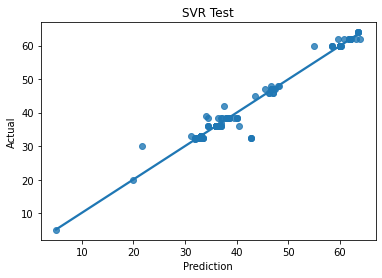

In [ ]:
test_pred = svm_reg.predict(X_test)
sns.regplot(test_pred,y_test,ci=None)
#plt.plot(test_pred,y_test)
plt.title("SVR Test")
plt.xlabel('Prediction')
plt.ylabel('Actual')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Actual')

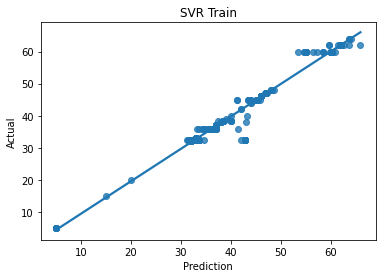

In [ ]:
test_pred = svm_reg.predict(X_train)
sns.regplot(test_pred,y_train,ci=None)
#plt.plot(test_pred,y_test)
plt.title("SVR Train")
plt.xlabel('Prediction')
plt.ylabel('Actual')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Actual')

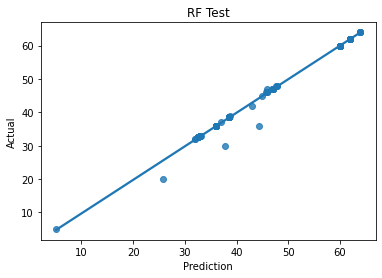

In [ ]:
test_pred = rf_reg.predict(X_test)
sns.regplot(test_pred,y_test,ci=None)
#plt.plot(test_pred,y_test)
plt.title("RF Test")
plt.xlabel('Prediction')
plt.ylabel('Actual')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Actual')

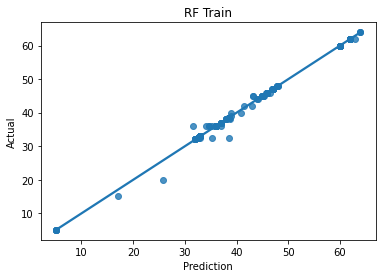

In [ ]:
test_pred = rf_reg.predict(X_train)
sns.regplot(test_pred,y_train,ci=None)
#plt.plot(test_pred,y_test)
plt.title("RF Train")
plt.xlabel('Prediction')
plt.ylabel('Actual')